# Old Babylonian Lists of Trees and Wooden Objects
This notebook will use data scraped from [DCCLT](http://oracc.org/dcclt) with the notebooks [Save ORACC HTML files](https://github.com/niekveldhuis/Digital-Assyriology/blob/master/Scrape-Oracc/Save%20Oracc%20HTML%20files.ipynb) and [Scrape Oracc](https://github.com/niekveldhuis/Digital-Assyriology/blob/master/Scrape-Oracc/Scrape%20Oracc.ipynb), using the input file [ob_lists_wood.txt](https://github.com/ErinBecker/digital-humanities-phylogenetics/blob/master/data/text_ids/ob_lists_wood.txt). The input file lists all the Text IDs of Old Babylonian lists of trees and wooden objects currently in DCCLT, as well as the composite text of the Nippur version. Text IDs consist of a P plus a six-digit number (commonly referred to as P-number) that is recognized by [ORACC](http://oracc.org) and by [CDLI](http://cdli.ucla.edu) and that has become the de-facto standard in Assyriology. [CDLI](http://cdli.ucla.edu) provides metadata (provenience, period, publication, museum number, etc) for each text.  Composite text IDs consist of a Q plus a six-digit number.

The raw data are placed in the directory [data/raw](https://github.com/ErinBecker/digital-humanities-phylogenetics/tree/master/data/raw). Each text has a separate file named dcclt_P######.txt (or dcclt_Q######.txt). These are comma-separated files with the fields id_text, text_name, l_no, text. 

| field         | description                     |
|-----------	|------------------------------------------------------------------------------------------------------------------------------------------------------	|
| text_id   	| allows creation of a link to the online edition in [DCCLT](http://oracc.org/dcclt) and/or to the images and metadata in [CDLI](http://cdli.ucla.edu) 	|
| text_name 	| a reference to a text (publication or museum number) that is recognizable by Assyriologists                                                          	|
| l_no      	| line number: obverse/reverse, column number, line number (e.g. o ii 16')                                                                                  	|
| text      	| Sumerian words in lemmatized form (e.g. lugal[king]N)                                                                                                     	|

In [1]:
import pandas as pd
import numpy as np
import re

# Create list of Text Files
The input list used for scraping is used here again to create a list of file names.

In [2]:
textlist = '../data/text_ids/ob_lists_wood.txt'
with open(textlist) as f:
    text_ids = f.readlines()
text_ids = [id.strip() for id in text_ids]
# strip in case there are any accidental spaces
path = "../data/raw/"
filenames = [path + id.replace('/', '_') + '.txt' for id in text_ids]
filenames[:5]

['../data/raw/dcclt_Q000039.txt',
 '../data/raw/dcclt_P117395.txt',
 '../data/raw/dcclt_P117404.txt',
 '../data/raw/dcclt_P128345.txt',
 '../data/raw/dcclt_P224980.txt']

# Open Files
Open each file and create a Dataframe in Pandas and create a list of Dataframes. Concatenate that list into a single Dataframe and re-index. 

In [3]:
list_ = [pd.read_csv(file_,index_col=None, header=0) for file_ in filenames]
df = pd.concat(list_).reset_index(drop=True)

In [4]:
df

,id_text,text_name,l_no,text
0,dcclt/Q000039,OB Nippur Ura 01,1,sux:taškarin[boxwood]N
1,dcclt/Q000039,OB Nippur Ura 01,2,sux:esi[tree]N
2,dcclt/Q000039,OB Nippur Ura 01,3,sux:ŋešnu[tree]N
3,dcclt/Q000039,OB Nippur Ura 01,4,sux:halub[tree]N
4,dcclt/Q000039,OB Nippur Ura 01,5,sux:šagkal[tree]N
5,dcclt/Q000039,OB Nippur Ura 01,6,sux:ŋešgana[tree]N
6,dcclt/Q000039,OB Nippur Ura 01,6a,sux:ŋešgana[tree]N sux:babbar[white]V/i
7,dcclt/Q000039,OB Nippur Ura 01,6b,sux:ŋešgana[tree]N sux:giggi[black]V/i
8,dcclt/Q000039,OB Nippur Ura 01,7,sux:ŋeš[tree]N sux:giggi[black]V/i
9,dcclt/Q000039,OB Nippur Ura 01,8,sux:ŋeštin[vine]N


# Create `text_id` `text_name` equivalence table
The fields `text_id` and `text_name` are essentially equivalent: each points unambiguously to an individual text document. They are used, however, for different purposes (machine vs. human). It is useful to have an equivalence table, so that we do not have to keep both fields in the dataframe.

In [5]:
id_names_equiv_df = df[['id_text', 'text_name']].drop_duplicates().set_index('id_text')
id_names_equiv_df.head()

,text_name
id_text,
dcclt/Q000039,OB Nippur Ura 01
dcclt/P117395,MVN 13 622 [OB Ura]
dcclt/P117404,MVN 13 631 [OB Ura]
dcclt/P128345,Rochester 248 [OB Ura]
dcclt/P224980,TIM 10 001


# Add some Metadata
Add some (incomplete) metadata by hand. Metadata such as provenance can be drawn from ORACC or CDLI.

In [6]:
id_names_equiv_df['provenance'] = np.repeat('unprovenanced', len(id_names_equiv_df))
id_names_equiv_df.ix['dcclt/Q000039']['provenance']= 'Nippur'
id_names_equiv_df.loc[id_names_equiv_df.text_name.str.contains('IB'), 'provenance'] = 'Isin'
id_names_equiv_df.loc[id_names_equiv_df.text_name.str.contains('KM'), 'provenance'] = 'Isin'
id_names_equiv_df.loc[id_names_equiv_df.text_name.str.contains('BRM 4 29'), 'provenance'] = 'Ur'
id_names_equiv_df.loc[id_names_equiv_df.text_name.str.contains('UET'), 'provenance'] = 'Ur'
id_names_equiv_df.loc[id_names_equiv_df.text_name.str.contains('AUWE'), 'provenance'] = 'Uruk'
id_names_equiv_df.loc[id_names_equiv_df.provenance != 'unprovenanced']

,text_name,provenance
id_text,,
dcclt/Q000039,OB Nippur Ura 01,Nippur
dcclt/P235262,EEN 268-269 KM 89542 [OB Ura],Isin
dcclt/P250364,BRM 4 29 + 30 [OB Ura],Ur
dcclt/P346714,UET 6 0677 + 0678 + UET 7 0087 + 0091 (UET 6 0...,Ur
dcclt/P346865,UET 6 0828 [OB Ura],Ur
dcclt/P346866,UET 6 0829 [OB Ura],Ur
dcclt/P346867,UET 6 0830 [OB Ura],Ur
dcclt/P346868,UET 6 0831 [OB Ura],Ur
dcclt/P346869,UET 6 0832 [OB Ura],Ur


# Create Expressions
A line in a lexical text may contain more than one word. Usually a list is divided into sections by keyword, for instance:

| text                	| translation                      	|
|---------------------	|----------------------------------	|
| {ŋeš}gigir          	| chariot                          	|
| {ŋeš}e₂ gigir       	| chariot cabin                    	|
| {ŋeš}e₂ usan₃ gigir 	| storage box for the chariot whip 	|
| {ŋeš}gaba gigir     	| breastwork of a chariot          	|

In the comparison between different versions of the list the individual words are less interesting than the *entries*, that is: the sequence of words in a single line. In order to look at entries (rather than words), words in an entry are connected by asterisks (\*). Since in this case all words are in Sumerian, the language designation (sux:) is removed from the field `entries`.

In [7]:
df['entries'] = df['text']
df['entries'] = df['entries'].str.replace(' ', '*')
df['entries'] = df['entries'].str.replace('sux:', '')
df

,id_text,text_name,l_no,text,entries
0,dcclt/Q000039,OB Nippur Ura 01,1,sux:taškarin[boxwood]N,taškarin[boxwood]N
1,dcclt/Q000039,OB Nippur Ura 01,2,sux:esi[tree]N,esi[tree]N
2,dcclt/Q000039,OB Nippur Ura 01,3,sux:ŋešnu[tree]N,ŋešnu[tree]N
3,dcclt/Q000039,OB Nippur Ura 01,4,sux:halub[tree]N,halub[tree]N
4,dcclt/Q000039,OB Nippur Ura 01,5,sux:šagkal[tree]N,šagkal[tree]N
5,dcclt/Q000039,OB Nippur Ura 01,6,sux:ŋešgana[tree]N,ŋešgana[tree]N
6,dcclt/Q000039,OB Nippur Ura 01,6a,sux:ŋešgana[tree]N sux:babbar[white]V/i,ŋešgana[tree]N*babbar[white]V/i
7,dcclt/Q000039,OB Nippur Ura 01,6b,sux:ŋešgana[tree]N sux:giggi[black]V/i,ŋešgana[tree]N*giggi[black]V/i
8,dcclt/Q000039,OB Nippur Ura 01,7,sux:ŋeš[tree]N sux:giggi[black]V/i,ŋeš[tree]N*giggi[black]V/i
9,dcclt/Q000039,OB Nippur Ura 01,8,sux:ŋeštin[vine]N,ŋeštin[vine]N


# Group by Document
The `groupby()` function is used to group the data by document. The function `apply(' '.join)` concatenates the text in the `entries` column, separating them with a white space. The Pandas `groupby()` function results in a series, which is then tranformed into a new Dataframe.

In [8]:
entries_df = df[['id_text', 'entries']]
entries_df = entries_df.dropna()
grouped = entries_df['entries'].groupby(entries_df['id_text']).apply(' '.join)
by_text_df = pd.DataFrame(grouped)
by_text_df.head()

,entries
id_text,
dcclt/P117395,ŋešed[key]N pakud[~tree]N
dcclt/P117404,ig[door]N*eren[cedar]N ig[door]N*dib[board]N
dcclt/P128345,garig[comb]N*siki[hair]N garig[comb]N
dcclt/P224980,gigir[chariot]N e[house]N*gigir[chariot]N
dcclt/P224986,guza[chair]N*anše[equid]N guza[chair]N*kaskal[...


# Document Term Matrix
Transform the DataFrame into a Document Term Matrix (DTM) by using CountVecorizer. This function uses a Regular Expression (token_pattern) to indicate how to find the beginning and end of token. In the current Dataframe entries are separated from each other by a white space. The expression `r.[^ ]+` means: any combination of characters, except the space.

The output of the CountVectorizer (`dtm`) is not in a human-readable format. It is transformed into another DataFrame, with `id_text` as index.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer='word', token_pattern=r'[^ ]+')
dtm = cv.fit_transform(by_text_df['entries'])
dtm_df = pd.DataFrame(dtm.toarray(), columns = cv.get_feature_names(), index = by_text_df.index.values)
dtm_df.head()

,a[arm]n*apin[plow]n,a[arm]n*gud[ox]n*apin[plow]n,a[arm]n*umbin[wheel]n*margida[cart]n,ad[bush]n,ad[log]n*ma[ship]n,adar[plant]n,adus[plank]n*ma[ship]n,aga.dun₃@g.ma[ax]n,aga[ax]n,aga[ax]n*aʾašŋar[ax]n,...,šuʾa[stool]n,šuʾa[stool]n*ašgab[leatherworker]n,šuʾa[stool]n*burgul[stone-cutter]n,šuʾa[stool]n*dus[bathroom]n,šuʾa[stool]n*kaskal[way]n,šuʾa[stool]n*nagar[carpenter]n,šuʾa[stool]n*niŋgula[greatness]n,šuʾa[stool]n*suhsah[sound]n,šuʾa[stool]n*tibira[sculptor]n,šuʾura[goose]n
dcclt/P117395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dcclt/P117404,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dcclt/P128345,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dcclt/P224980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dcclt/P224986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Analyzing the DTM
There are various ways in which a DTM may be analyzed. Each document may be understood as a vector, which allows for various kinds of computations, such as distance or cosine-similarity. 

It is important to recall that the DTM does not preserve information about the order of entries. In comparing versions of a lexical text we may think of four types of features: 

* presence or absence of entries
* order of entries in a section
* order of sections in the document
* spelling of words

The present DTM can only address the first feature.

It is also important to realize that the documents in this analysis of are of very different length (from 1 to 750 entries), with more than half of the documents 2 lines or less. The composite text from Nippur is by far the longest document and will dominate any comparison

In [10]:
df_length = dtm_df.sum(axis=1)
df_length.describe()

count    103.000000
mean      38.864078
std      112.057762
min        1.000000
25%        2.000000
50%        2.000000
75%       13.000000
max      750.000000
dtype: float64

We need to know how sparse the DTM is. How often does each entry appear in the entire collection of documents?

Note that I'll be doing some analysis in R, whereas Niek will be doing some in Python. We can use both languages in different cells of the same notebook and even pass variables between languages. See tip #21 [here](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/).


In [12]:
import rpy2.ipython
%load_ext rpy2.ipython


  1   2   3   4   5   6   7   8   9  10  13  14  16  18  19  21  22  34  36  39 
  7  48   7   1   2   3   2   3   1   1   3   1   1   1   1   2   1   1   1   1 
 43  88  91  93  95 138 142 149 158 167 196 350 487 564 750 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 


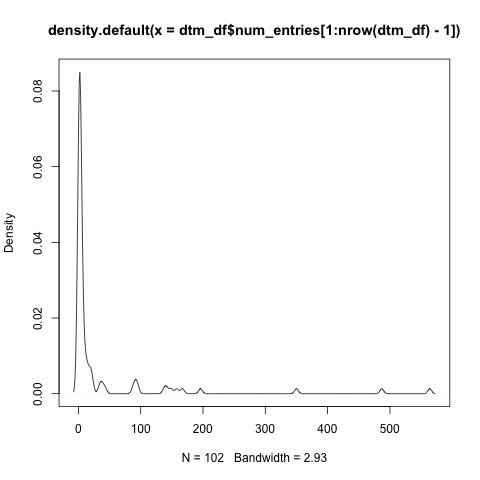

In [13]:
%%R -i dtm_df
dtm_df$num_entries = rowSums(dtm_df)

plot(density(dtm_df$num_entries[1:nrow(dtm_df)-1])) #don't include sum of all entries across documents in density plot
table(dtm_df$num_entries[1:nrow(dtm_df)]) #number of documents with each number of entries

Only 30 documents have 10 or more entries. Ten documents have greater than 100 entries.

How frequently do entries re-occur across documents?

In [ ]:
%%R -i dtm_df

dtm_df["Total",] = colSums(dtm_df)

plot(density(unlist(dtm_df["Total", 1:ncol(dtm_df)-1])))
dtm_df["Total",which(dtm_df["Total",]>10)]

entry_frequency = unlist(dtm_df["Total",])
summary(entry_frequency)

There are a few entries which are very common, including one (ŋešnimbar.palm.n) which appears in almost all of the documents. But most, as expected, are very rare, with 75% appearing in 3 or fewer documents.

# Cosine Similarity/Distance
Cosine similarity ignores the length of the vector. Cosine distance equals 1 - cosine similarity.

Since many of these texts are very short, they have no overlap and thus a cosine distance of 1.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(dtm)
dist_df = pd.DataFrame(np.round(dist, 2), index=dtm_df.index.values, columns=dtm_df.index.values)
dist_df.head()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

In [ ]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
names = dist_df.index.values
xs, ys = pos[:, 0], pos[:, 1]


In [ ]:
for x, y, name in zip(xs, ys, names):
    color = 'orange' if "Q" in name else 'skyblue'
    plt.scatter(x, y, c=color)
    plt.text(x, y, name[6:])

In [ ]:
plt.show()

In [ ]:
id_text = dist_df.index.values
text_name = [id_names_equiv_df.ix[textid]['text_name'] for textid in id_text]
provenance = [id_names_equiv_df.ix[textid]['provenance'] for textid in id_text]
colormap = {'Nippur': "blue", 'Ur': "green", 'Isin': "purple", 
          'Uruk': "red", 'unprovenanced': "black"}
colors = [colormap[p] for p in provenance]

In [ ]:
from bokeh.models import ColumnDataSource, OpenURL, TapTool, HoverTool
from bokeh.plotting import figure, output_file, output_notebook, show

output_notebook()

p = figure(
    plot_width=800, plot_height=800,
    tools="tap,pan,wheel_zoom,box_zoom,reset,save", 
    title="Multi Dimensional Scaling of OB lists of wood; based on Cosine Distance. Size of dot = length of document")
p.add_tools(HoverTool(
        tooltips=[
            ("url", "http://oracc.org/" + "@id_text"),
            ("text name", "@text_name"),
            ("provenance", "@provenance")
        ]
        ))

source = ColumnDataSource(data=dict(
        x=xs,
        y=ys,
        id_text=list(dist_df.index.values),
        size = df_length/max(df_length)*50,
        text_name = text_name,
        provenance = provenance,
        colors = colors
    ))

p.circle('x', 'y', color='colors', size='size', source=source)

url = "http://oracc.museum.upenn.edu/@id_text"
    

taptool = p.select(type=TapTool)
taptool.callback = OpenURL(url=url)

show(p)

# Discussion
The above visualization is not very satisfactory. It is based *only* on shared entries. Large texts (large circles) group together because they have a larger number of shared entries.

Commonalities between texts that have been identified by hand (e.g. the green dots, provenance Ur or the purple dots, provenance Isin) are not refelcted in the graph.

Many of the dots are so small that they are currently invisible. A graph that does not size the dots according to text length shows an even distribution of the dots over the space.